In [13]:
from util import DoseFields, parse_dose, pretty_save
import pandas as pd
import matplotlib.pyplot as plt

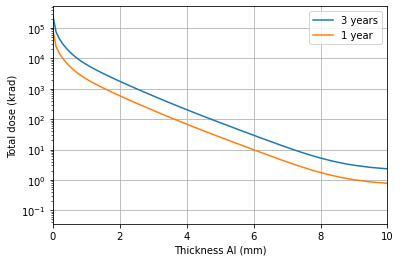

In [14]:
df1y = parse_dose("data/dose1y.dos")
df3y = parse_dose("data/dose3y.dos")

fig, ax = plt.subplots(1,1)

ax = df3y.plot(x=DoseFields.thickness, y=DoseFields.total_dose, ax=ax, label="3 years")
ax = df1y.plot(x=DoseFields.thickness, y=DoseFields.total_dose, ax=ax, label="1 year")
ax.set_xbound(upper=10, lower=0)
ax.set_yscale('log')
ax.set_xlabel(DoseFields.thickness.value)
ax.set_ylabel(DoseFields.total_dose.value)
ax.grid()
pretty_save(fig, "generated/TID_main.jpg")

In [15]:
with open("generated/TID.csv", "w") as f:
    for years, df in {"1": df1y, "3": df3y}.items():
        f.write(f"{years} años")
        for thickness in [1, 10]:
            elem = df.loc[df[DoseFields.thickness] == thickness]
            total_dose = elem[DoseFields.total_dose].iloc[0]
            display(f"Years={years}, Thickness={thickness}, Total dose={total_dose}")
            f.write(f",{total_dose}")
        f.write("\n")

'Years=1, Thickness=1, Total dose=2131.0'

'Years=1, Thickness=10, Total dose=0.7735'

'Years=3, Thickness=1, Total dose=6394.0'

'Years=3, Thickness=10, Total dose=2.321'